# 🧠 Projeto Final – Classificação de Defeitos em Chapas de Aço Inoxidável

## 🏭 Contextualização



Uma empresa do setor siderúrgico contratou você para a criação de um sistema inteligente de controle de qualidade para chapas de aço inoxidável.  
Essa empresa forneceu um conjunto de dados contendo informações extraídas a partir de imagens de superfície das chapas, com o objetivo de **detectar e classificar defeitos automaticamente**.

Cada amostra no conjunto de dados é composta por **31 indicadores** que descrevem aspectos **geométricos e estatísticos** do defeito identificado, como:

- Área  
- Perímetro  
- Índices de orientação  
- Luminosidade  
- Proporção de bordas

Além dessas características, cada amostra é rotulada com uma das **sete possíveis classes de defeitos** (seis categorias específicas e uma categoria genérica de “outros defeitos”).

O sistema deverá ser capaz de, a partir do cadastro de uma nova imagem (ou conjunto de medições), **prever a classe do defeito** e **retornar a probabilidade associada**.  
Além disso, a empresa espera que você **extraia insights da operação e dos defeitos** e **gere visualizações de dados** relevantes para o processo de qualidade.

# 📅 Cronograma e Etapas do Projeto Final - Bootcamp CDIA



## 🧠 1. Entendimento do Problema
- Compreensão do contexto industrial e do impacto do projeto.
- Definição do tipo de modelagem: binária, multiclasse ou multirrótulo.
- Escolha de métricas de avaliação adequadas (Ex: F1-score, ROC-AUC, etc.).

## 🗃️ 2. Análise Exploratória dos Dados (EDA)
- Carregamento dos dados (`Bootcamp_train.csv`).
- Verificação de tipos de dados, valores ausentes e outliers.
- Análise estatística dos atributos.
- Correlação entre atributos e visualização de distribuições.

## 📊 3. Visualizações e Insights
- Histogramas, boxplots, heatmaps de correlação.

## 🛠️ 4. Pré-processamento dos Dados
- Tratamento de valores nulos e outliers.
- Normalização/Padronização dos dados.
- Feature selection ou engenharia de novas variáveis, se necessário.
- Divisão em treino/validação.

## 🧪 5. Modelagem Preditiva
- Teste de diferentes abordagens de modelagem:
  - Regressão Logística
  - Random Forest
  - DECISION TREE
  - SVM
  - KNN
- Comparação de desempenho (acurácia, precisão, recall, F1).
- Escolha do modelo final com base nas métricas.

## 🎯 6. Avaliação Final
- Aplicação do modelo final no `bootcamp_test.csv`.
- Geração do arquivo de submissão com predições.
- Uso da API para avaliação final (fora do processo de treinamento).

## 🚀 7. Desenvolvimento e Entrega
- Criação do repositório GitHub público com:
  - Notebooks limpos.
  - README explicando o projeto.
- Material de apresentação (slides).

## 📆 Planejamento por Datas

| Data       | Atividade                                                                 |
|------------|---------------------------------------------------------------------------|
| **10/05**  | Início do projeto, carregamento dos dados e análise inicial de variáveis  |
|            | - Verificação de valores nulos e estatísticas descritivas                 |
|            | - Visualizações simples por variável (histogramas, boxplots individuais)  |
|            | - Definição da abordagem de modelagem (binária, multiclasse ou multirrótulo) |
|            | - Escolha das métricas de avaliação (acurácia, F1-score, ROC-AUC, etc.)             |
| **11/05**  | Continuação da EDA e início do pré-processamento                          |
|            | - Visualizações complexas (heatmaps, correlação entre atributos, outliers)|
|            | - Tratamento de valores nulos e outliers                                  |
|            | - Normalização/Padronização dos dados                                     |
| **12-13/05** | Modelagem e avaliação                                                    |
|            | - Testes de algoritmos: Regressão Logística, Random Forest, KNN etc.  |
|            | - Escolha do modelo final com base nas métricas                          |
| **14/05**  | Ajustes finais e preparação da entrega                                     |                       |
|            | - Documentação (notebooks limpos)                        |
|            | - Preparação dos slides e submissão no GitHub                            |
| **15-16/05** | Apresentação para a banca                                               |



# 🧠 1. Entendimento do Problema


---

Uma empresa do setor siderúrgico contratou este projeto para desenvolver um sistema inteligente de controle de qualidade aplicado à identificação de **defeitos em chapas de aço inoxidável**, por meio da análise de dados extraídos de imagens.

O conjunto de dados fornecido contém:
- 31 **indicadores numéricos**, extraídos de imagens, como: área, perímetro, proporções, índices estatísticos, luminosidade, entre outros.
- Colunas booleanas indicando a presença ou ausência de **7 categorias de defeitos** (`falha_1` a `falha_6` e `falha_outros`), caracterizando um problema de **classificação multiclasse** (com 7 classes mutuamente exclusivas).

---

## 🧪 Definição do Tipo de Modelagem

🔍 **Problema de Classificação Multiclasse**  
Cada linha da base possui uma única classe de defeito associada, identificada por apenas uma coluna `falha_* = TRUE`, `"Sim"` ou 1.  
Portanto, o projeto será tratado como um problema de **classificação supervisionada multiclasse**, onde o objetivo é prever **qual das 7 categorias** um novo registro pertence.

---

## 📏 Métricas de Avaliação Selecionadas

Para avaliar os modelos, as seguintes métricas serão utilizadas:

- **Matriz de Confusão** – exibe os acertos e erros para cada classe.
- **Acurácia** – proporção total de previsões corretas.
- **Precisão** – proporção de previsões corretas para uma classe específica.
- **Recall**   – proporção de casos positivos corretamente identificados.
- **F1-Score** – média harmônica entre precisão e recall.
- **ROC-AUC**  – mede a capacidade de distinguir entre classes com base nas probabilidades.


# 🗃️ 2. Análise Exploratória dos Dados (EDA)

## 📂 Carregamento dos Dados e análise inicial do dataset

📦 Importação das bibliotecas necessárias

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

📂 Monta o Google Drive para acessar arquivos diretamente. Lê o arquivo CSV que está armazenado na pasta "bootcamp".

In [3]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/bootcamp/bootcamp_train.csv')

Mounted at /content/drive


👀 Exibindo as 5 primeiras linhas

In [4]:
df.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não


👀 Exibindo as 5 últimas linhas

In [142]:
df.tail()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
3385,3385,779,802.0,402237,402266,100,755,177,17,764.0,...,-0.1026,1.0000,103,False,False,False,False,não,True,Não
3386,3386,41,188.0,327823,327870,100,3437,248,116,354240.0,...,-0.1749,1.0000,42,0,False,False,False,não,False,Sim
3387,3387,823,834.0,323844,323852,100,135,20,-194,14169.0,...,-0.1264,0.3977,97,False,False,False,False,Não,True,Não
3388,3388,9505,-186.0,949856,949874,100,-206,29,26,NaN,...,-0.0238,0.8355,116,False,0,False,False,Não,False,Sim
3389,3389,1181,1191.0,1146871,1146879,100,12,5,5,1585.0,...,-0.0022,0.1400,120,False,False,False,False,Não,False,Sim


📐 Verificando o formato (dimensão) do DataFrame

In [143]:
df.shape

(3390, 39)

Verificando tipos de dados

In [144]:
df.dtypes

,0
id,int64
x_minimo,int64
x_maximo,float64
y_minimo,int64
y_maximo,int64
peso_da_placa,int64
area_pixels,int64
perimetro_x,int64
perimetro_y,int64
soma_da_luminosidade,float64


📊 Estrutura geral do DataFrame

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

🔢 Verificando a quantidade de valores únicos por coluna

In [146]:
df.nunique()

,0
id,3390
x_minimo,1136
x_maximo,945
y_minimo,2017
y_maximo,1809
peso_da_placa,1
area_pixels,850
perimetro_x,363
perimetro_y,294
soma_da_luminosidade,1783


🔍 Verificando valores ausentes

In [147]:
df.isnull().sum()

,0
id,0
x_minimo,0
x_maximo,56
y_minimo,0
y_maximo,0
peso_da_placa,0
area_pixels,0
perimetro_x,0
perimetro_y,0
soma_da_luminosidade,100


### 📊 Análise de Valores Nulos

Após a execução do código, verificamos a presença de valores nulos nas colunas do DataFrame. Abaixo estão os resultados da contagem de valores nulos por coluna:

| Coluna                         | Valores Nulos |
|--------------------------------|---------------|
| x_maximo                       | 56            |
| soma_da_luminosidade           | 100           |
| maximo_da_luminosidade         | 98            |
| tipo_do_aço_A400               | 76            |
| espessura_da_chapa_de_aço      | 41            |
| index_quadrado                 | 36            |
| indice_global_externo          | 59            |
| indice_de_luminosidade         | 50            |

- As demais colunas não possuem valores nulos.


Cálculo do percentual de valores nulos presente no DataFrame


In [5]:
colunas_com_nulos = ['x_maximo', 'soma_da_luminosidade', 'maximo_da_luminosidade', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço', 'index_quadrado', 'indice_global_externo', 'indice_de_luminosidade']
linhas_com_nulos = df[colunas_com_nulos].isnull().any(axis=1).sum()
print(f'O número de linhas com valores nulos nessas colunas é: {linhas_com_nulos}')

total_linhas = len(df)
percentual = (linhas_com_nulos / total_linhas) * 100
print(f'Isso representa {percentual:.2f}% do total de linhas do DataFrame.')

O número de linhas com valores nulos nessas colunas é: 481
Isso representa 14.19% do total de linhas do DataFrame.


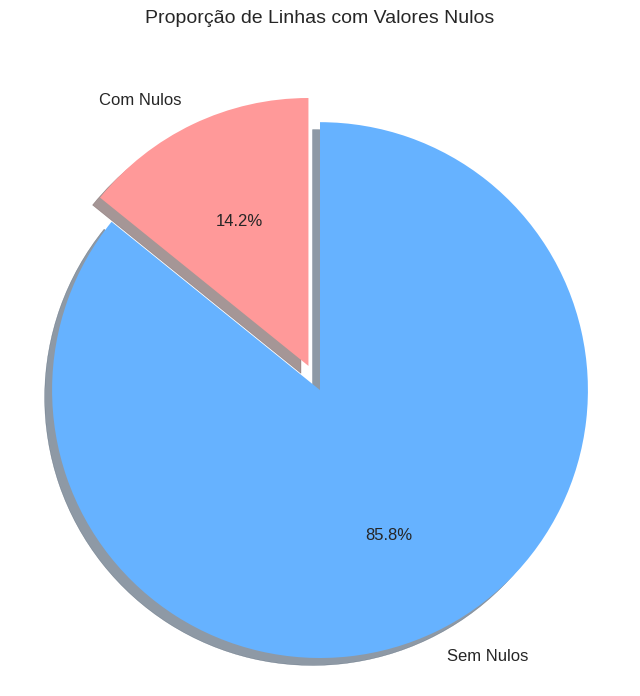

In [12]:
plt.style.use('seaborn-v0_8')
colors = ['#FF9999', '#66B2FF']

total_rows = 3390
null_rows = 481
non_null_rows = total_rows - null_rows
percent_null = (null_rows / total_rows) * 100
percent_non_null = 100 - percent_null

plt.figure(figsize=(8, 8))
plt.pie([null_rows, non_null_rows], labels=['Com Nulos', 'Sem Nulos'],
        colors=colors, autopct='%1.1f%%', startangle=90,
        explode=(0.1, 0), shadow=True, textprops={'fontsize': 12})
plt.title('Proporção de Linhas com Valores Nulos\n', fontsize=14, pad=20)
plt.axis('equal')
plt.show()

🔁 Verificando registros duplicados no DataFrame

In [149]:
df[df.duplicated(keep=False)]

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros


# 📝 Análise aprofundada de cada coluna

Nessa fase do projeto, realizei uma análise exploratória aprofundada de cada variável do conjunto de dados, verificando individualmente o tipo, a qualidade, a distribuição e a presença de inconsistências ou valores atípicos. O objetivo é garantir que cada coluna esteja bem compreendida e preparada para as etapas posteriores de pré-processamento e modelagem. Especificamente, espero:

- Confirmar os tipos de dados e converter quando necessário;
- Analisar a variedade de valores e detectar potenciais outliers;
- Documentar insights e decisões de limpeza para cada coluna;

### Conversão de colunas para formato Booleano (0/1)

**Objetivo:**  
As colunas `tipo_do_aço_A300`, `tipo_do_aço_A400`, `falha_1` a `falha_outros` representam os dois tipos de aço e as diferentes tipos de falhas detectadas nas chapas. Originalmente, esses campos estavam em formatos mistos (strings “Sim”/“Não”, `TRUE`/`FALSE`, 1/0), o que dificulta a consistência e o uso direto em algoritmos de machine learning.

**O que foi feito:**  
1. **Normalização de texto**  
   - Todas as entradas foram convertidas para minúsculas e sem espaços ( `'Sim'` → `'sim'`, `'FALSE '` → `'false'`).  
2. **Mapeamento para 0/1**  
   - Strings representando “verdadeiro” (`'sim'`, `'s'`, `'true'`, `'1'`) passaram a `1`.  
   - Strings representando “falso” (`'não'`, `'nao'`, `'n'`, `'false'`, `'0'`) passaram a `0`.  
   - Qualquer valor não reconhecido foi marcado como `NA` (tipo `Int64`).

**Benefícios dessa conversão:**  
- **Consistência de dados**: elimina variações de texto e tipos mistos, padronizando todas as falhas em 0 ou 1.  
- **Compatibilidade com modelos**: a maioria dos algoritmos de classificação e transformações do scikit-learn espera variáveis numéricas; esse formato evita erros de conversão ou necessidade de codificação adicional.  

In [150]:
# tipo_do_aço_A300
valores_unicos_A300 = df['tipo_do_aço_A300'].unique()
print("Tipos em A300:", valores_unicos_A300)
contagem_A300 = df['tipo_do_aço_A300'].value_counts(dropna=False)
print("\nFrequência em A300:\n", contagem_A300)

# tipo_do_aço_A400
valores_unicos_A400 = df['tipo_do_aço_A400'].unique()
print("Tipos em A400:", valores_unicos_A400)
contagem_A400 = df['tipo_do_aço_A400'].value_counts(dropna=False)
print("\nFrequência em A400:\n", contagem_A400)


Tipos em A300: ['Não' 'não' '1' 'Sim' 'sim' '0' 'N' '-']

Frequência em A300:
 tipo_do_aço_A300
Não    1169
Sim     802
não     770
sim     537
N        40
0        39
1        27
-         6
Name: count, dtype: int64
Tipos em A400: ['sim' 'Sim' 'Não' 'não' nan '1' '0' 'S' 'nao']

Frequência em A400:
 tipo_do_aço_A400
Sim    1142
Não     772
sim     757
não     513
NaN      76
S        40
1        39
nao      26
0        25
Name: count, dtype: int64


In [151]:
# falha_1
valores_unicos_falha1 = df['falha_1'].unique()
print("Tipos em falha_1:", valores_unicos_falha1)
contagem_falha1 = df['falha_1'].value_counts(dropna=False)
print("\nFrequência em falha_1:\n", contagem_falha1)

# falha_2
valores_unicos_falha2 = df['falha_2'].unique()
print("Tipos em falha_2:", valores_unicos_falha2)
contagem_falha2 = df['falha_2'].value_counts(dropna=False)
print("\nFrequência em falha_2:\n", contagem_falha2)

# falha_3
valores_unicos_falha3 = df['falha_3'].unique()
print("Tipos em falha_3:", valores_unicos_falha3)
contagem_falha3 = df['falha_3'].value_counts(dropna=False)
print("\nFrequência em falha_3:\n", contagem_falha3)

# falha_4
valores_unicos_falha4 = df['falha_4'].unique()
print("Tipos em falha_4:", valores_unicos_falha4)
contagem_falha4 = df['falha_4'].value_counts(dropna=False)
print("\nFrequência em falha_4:\n", contagem_falha4)

# falha_5
valores_unicos_falha5 = df['falha_5'].unique()
print("Tipos em falha_5:", valores_unicos_falha5)
contagem_falha5 = df['falha_5'].value_counts(dropna=False)
print("\nFrequência em falha_5:\n", contagem_falha5)

# falha_6
valores_unicos_falha6 = df['falha_6'].unique()
print("Tipos em falha_6:", valores_unicos_falha6)
contagem_falha6 = df['falha_6'].value_counts(dropna=False)
print("\nFrequência em falha_6:\n", contagem_falha6)

# falha_outros
valores_unicos_falha_outros = df['falha_outros'].unique()
print("Tipos em falha_outros:", valores_unicos_falha_outros)
contagem_falha_outros = df['falha_outros'].value_counts(dropna=False)
print("\nFrequência em falha_outros:\n", contagem_falha_outros)


Tipos em falha_1: ['False' '0' '1' 'True' 'nao' 'S']

Frequência em falha_1:
 falha_1
False    2992
True      265
nao        62
0          61
1           5
S           5
Name: count, dtype: int64
Tipos em falha_2: ['0' 'False' 'True' 'y' '1' 'S']

Frequência em falha_2:
 falha_2
False    3064
True      249
0          62
y           5
1           5
S           5
Name: count, dtype: int64
Tipos em falha_3: [False  True]

Frequência em falha_3:
 falha_3
False    2741
True      649
Name: count, dtype: int64
Tipos em falha_4: ['False' 'True' 'nao' '0' 'S' '1']

Frequência em falha_4:
 falha_4
False    3145
True      112
nao        65
0          64
S           2
1           2
Name: count, dtype: int64
Tipos em falha_5: ['não' 'Não' 'Sim' 'sim']

Frequência em falha_5:
 falha_5
Não    1977
não    1317
Sim      58
sim      38
Name: count, dtype: int64
Tipos em falha_6: [False  True]

Frequência em falha_6:
 falha_6
False    2584
True      806
Name: count, dtype: int64
Tipos em falha_outros: ['

In [158]:
cols_bool = [
    'tipo_do_aço_A300', 'tipo_do_aço_A400',
    'falha_1', 'falha_2', 'falha_3',
    'falha_4', 'falha_5', 'falha_6',
    'falha_outros'
]

bool_map = {
    'true': 1, 'false': 0,
    'sim': 1, 's': 1, '1': 1, 'y': 1,
    'não': 0, 'nao': 0, 'n': 0, '0': 0
}

def convert_bool_columns(df, cols, mapping):
    for col in cols:
        df[col] = (
            df[col]
              .astype(str)
              .str.strip()
              .str.lower()
              .map(mapping)
              .astype('Int64')
        )
    return df

df = convert_bool_columns(df, cols_bool, bool_map)

In [159]:
# tipo_do_aço_A300
valores_unicos_A300 = df['tipo_do_aço_A300'].unique()
print("Tipos em A300:", valores_unicos_A300)
contagem_A300 = df['tipo_do_aço_A300'].value_counts(dropna=False)
print("\nFrequência em A300:\n", contagem_A300)

# tipo_do_aço_A400
valores_unicos_A400 = df['tipo_do_aço_A400'].unique()
print("Tipos em A400:", valores_unicos_A400)
contagem_A400 = df['tipo_do_aço_A400'].value_counts(dropna=False)
print("\nFrequência em A400:\n", contagem_A400)

Tipos em A300: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64

Frequência em A300:
 tipo_do_aço_A300
0    2021
1    1368
Name: count, dtype: Int64
Tipos em A400: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64

Frequência em A400:
 tipo_do_aço_A400
1    2021
0    1368
Name: count, dtype: Int64


### Preenchimento de Valores Ausentes nas Colunas `tipo_do_aço_A300` e `tipo_do_aço_A400`

A decisão de preencher valores ausentes nas colunas `tipo_do_aço_A300` e `tipo_do_aço_A400` baseia-se na suposição de que essas variáveis são mutuamente exclusivas, ou seja, um tipo de aço só pode ser A300 ou A400. Assim, se uma das colunas tem valor 0 (indicando ausência do tipo), a outra deve ser 1 (indicando presença), e vice-versa. O preenchimento utiliza a relação complementar: para valores ausentes em `tipo_do_aço_A300`, assume-se `1 - tipo_do_aço_A400`, e para `tipo_do_aço_A400`, assume-se `1 - tipo_do_aço_A300`.

In [160]:
df['tipo_do_aço_A300'] = df['tipo_do_aço_A300'].fillna(1 - df['tipo_do_aço_A400'])
df['tipo_do_aço_A400'] = df['tipo_do_aço_A400'].fillna(1 - df['tipo_do_aço_A300'])

### Análise de Inconsistências em `tipo_do_aço_A300` e `tipo_do_aço_A400`

**Problema**: A tabela cruzada (`crosstab`) entre `tipo_do_aço_A300` e `tipo_do_aço_A400` revelou uma inconsistência: uma observação com `tipo_do_aço_A300 = 0` e `tipo_do_aço_A400 = 0`, indicando que o tipo de aço não foi identificado (soma igual a 0). Como essas colunas devem ser mutuamente exclusivas (um aço é A300 ou A400), essa linha é inválida.

In [161]:
ct = pd.crosstab(
    df['tipo_do_aço_A300'],
    df['tipo_do_aço_A400'],
    dropna=False
)
print(ct)


tipo_do_aço_A400     0     1
tipo_do_aço_A300            
0                    0  2021
1                 1368     0


**Solução**: A decisão foi remover esse registro onde a soma de `tipo_do_aço_A300` e `tipo_do_aço_A400` é igual a 0, garantindo que cada registro tenha um tipo de aço definido.

In [162]:
df = df[(df['tipo_do_aço_A300'] + df['tipo_do_aço_A400']) != 0].reset_index(drop=True)

ct = pd.crosstab(
    df['tipo_do_aço_A300'],
    df['tipo_do_aço_A400'],
    dropna=False
)
print(ct)

tipo_do_aço_A400     0     1
tipo_do_aço_A300            
0                    0  2021
1                 1368     0


Verificando valores negativos em todas as colunas numéricas

In [163]:
negativos = df.select_dtypes(include=['int64', 'float64', 'Int64']).applymap(lambda x: x < 0)

colunas_com_negativos = negativos.any()
print(colunas_com_negativos[colunas_com_negativos == True])

x_minimo                        True
x_maximo                        True
y_minimo                        True
y_maximo                        True
area_pixels                     True
perimetro_x                     True
perimetro_y                     True
comprimento_do_transportador    True
espessura_da_chapa_de_aço       True
indice_de_variacao_x            True
indice_de_variacao_y            True
indice_de_orientaçao            True
indice_de_luminosidade          True
dtype: bool


<ipython-input-163-c8aec3d6ecbe>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  negativos = df.select_dtypes(include=['int64', 'float64', 'Int64']).applymap(lambda x: x < 0)


### Tratamento de Valores Negativos em Colunas Numéricas

A decisão de substituir valores negativos por `pd.NA` nas colunas `x_minimo`, `x_maximo`, `y_minimo`, `y_maximo`, `area_pixels`, `perimetro_x`, `perimetro_y`, `comprimento_do_transportador` e `espessura_da_chapa_de_aço` foi motivada pela natureza dessas variáveis, que representam medidas físicas (como dimensões, áreas e espessuras). Esses valores provavelmente surgiram devido a erros de sensores, falhas de software ou imputação humana incorreta.

In [164]:
for col in ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço', ]:
    df[col] = df[col].mask(df[col] < 0, pd.NA)

Verificando novamente valores negativos em todas as colunas numéricas

In [165]:
negativos = df.select_dtypes(include=['int64', 'float64', 'Int64']).applymap(lambda x: x < 0)

colunas_com_negativos = negativos.any()
print(colunas_com_negativos[colunas_com_negativos == True])

indice_de_variacao_x      True
indice_de_variacao_y      True
indice_de_orientaçao      True
indice_de_luminosidade    True
dtype: bool


<ipython-input-165-c8aec3d6ecbe>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  negativos = df.select_dtypes(include=['int64', 'float64', 'Int64']).applymap(lambda x: x < 0)


🔍 Verificando novamente valores ausentes, após alteração dos valores negativos de certas colunas

In [166]:
df.isnull().sum()

,0
id,0
x_minimo,339
x_maximo,389
y_minimo,339
y_maximo,339
peso_da_placa,0
area_pixels,339
perimetro_x,339
perimetro_y,339
soma_da_luminosidade,100


**Estatísticas Descritivas**: Calcula-se um resumo estatístico, exibindo valores como mínimo, máximo, quartis (25%, 50%, 75%), média e desvio padrão, fornecendo uma visão geral da distribuição dos dados.
**Detecção de Outliers**: Utiliza o método do intervalo interquartil (IQR) para identificar outliers. Calcula-se o IQR (`q3 - q1`), definindo limites inferior (`q1 - 1.5 * IQR`) e superior (`q3 + 1.5 * IQR`). Observações fora desses limites são contadas como outliers.
**Visualização**: Gera dois gráficos para cada coluna:
   - Um **histograma** (com 25 bins) para visualizar a distribuição dos dados, ignorando valores ausentes.
   - Um **boxplot** para destacar a dispersão, quartis e possíveis outliers.
**Exibição**: Para cada coluna, imprime-se o nome, o resumo estatístico, o número de outliers e os limites do IQR, além de exibir os gráficos.


=== id ===
min        0.000000
25%      847.000000
50%     1694.000000
75%     2541.000000
max     3389.000000
mean    1694.094718
std      978.612930
Name: id, dtype: float64
Outliers (IQR): 0 | Limites: [-1694.00, 5082.00]


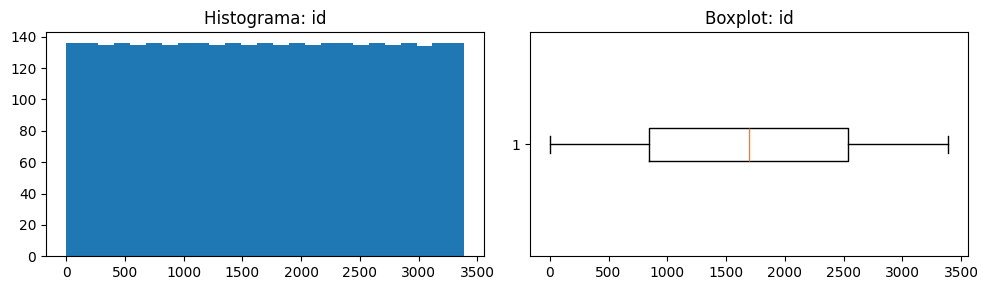


=== x_minimo ===
min         0.000000
25%        90.000000
50%       767.000000
75%      1235.000000
max     15266.000000
mean     1107.691803
std      1860.841602
Name: x_minimo, dtype: float64
Outliers (IQR): 184 | Limites: [-1627.50, 2952.50]


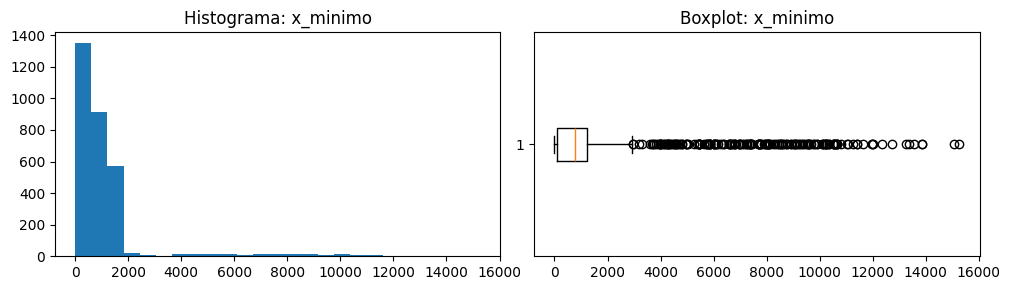


=== x_maximo ===
min        4.000000
25%      210.000000
50%      634.000000
75%     1135.500000
max     1713.000000
mean     693.931667
std      506.367237
Name: x_maximo, dtype: float64
Outliers (IQR): 0 | Limites: [-1178.25, 2523.75]


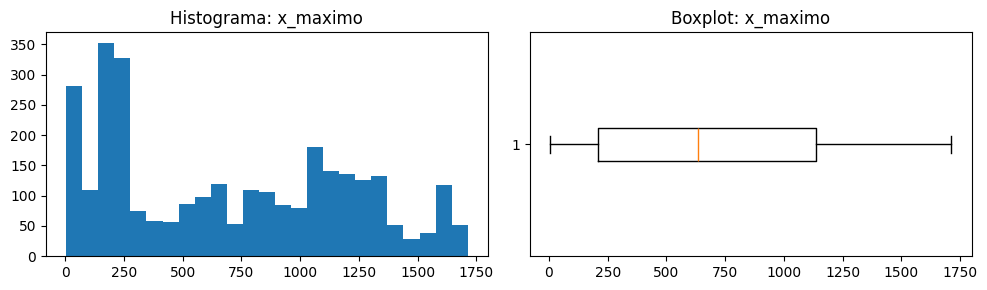


=== y_minimo ===
min     6.712000e+03
25%     6.393932e+05
50%     1.452850e+06
75%     2.762149e+06
max     1.041366e+08
mean    2.992246e+06
std     5.855028e+06
Name: y_minimo, dtype: float64
Outliers (IQR): 320 | Limites: [-2544740.75, 5946283.25]


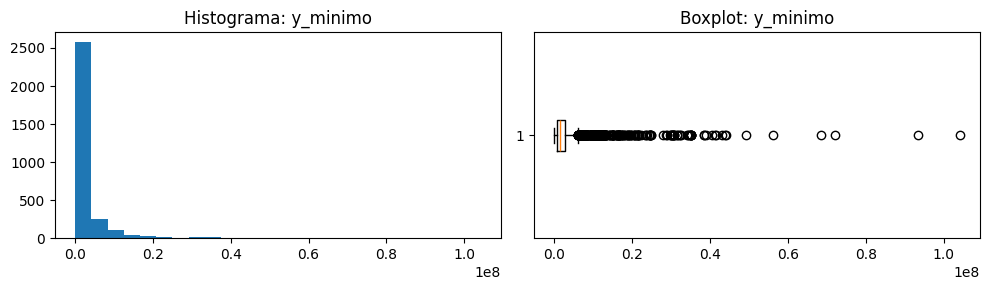


=== y_maximo ===
min     6.724000e+03
25%     5.816918e+05
50%     1.312582e+06
75%     2.312039e+06
max     1.291709e+07
mean    1.769263e+06
std     1.836826e+06
Name: y_maximo, dtype: float64
Outliers (IQR): 150 | Limites: [-2013829.12, 4907559.88]


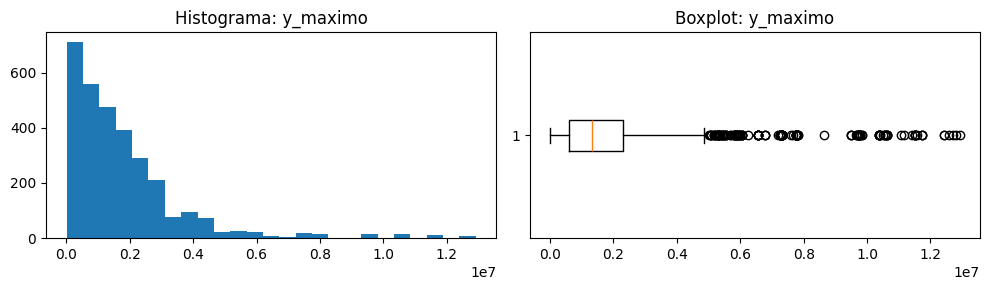


=== peso_da_placa ===
min     100.0
25%     100.0
50%     100.0
75%     100.0
max     100.0
mean    100.0
std       0.0
Name: peso_da_placa, dtype: float64
Outliers (IQR): 0 | Limites: [100.00, 100.00]


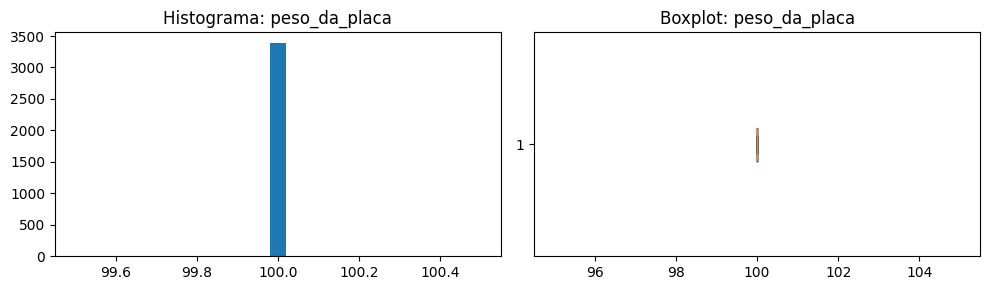


=== area_pixels ===
min          2.000000
25%         86.000000
50%        168.000000
75%        677.000000
max     152655.000000
mean      1761.952787
std       4529.960102
Name: area_pixels, dtype: float64
Outliers (IQR): 615 | Limites: [-800.50, 1563.50]


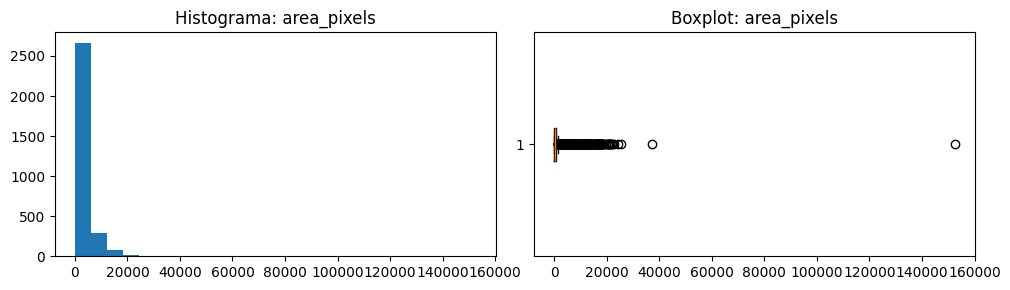


=== perimetro_x ===
min        2.000000
25%       14.000000
50%       25.000000
75%       69.000000
max     1275.000000
mean      99.534754
std      177.455069
Name: perimetro_x, dtype: float64
Outliers (IQR): 608 | Limites: [-68.50, 151.50]


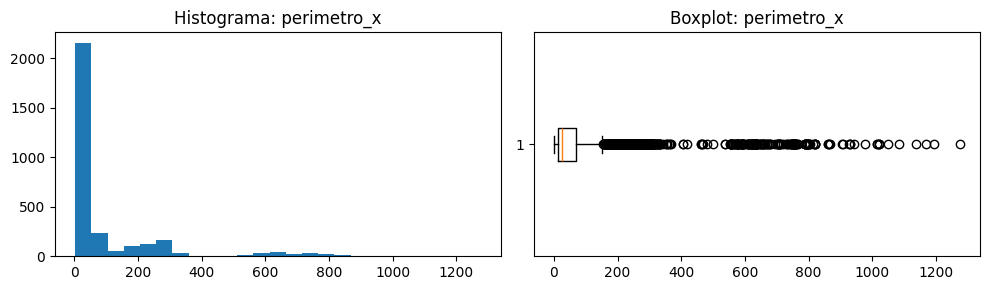


=== perimetro_y ===
min         2.000000
25%        13.000000
50%        24.000000
75%        68.000000
max     18152.000000
mean       74.041311
std       344.799358
Name: perimetro_y, dtype: float64
Outliers (IQR): 323 | Limites: [-69.50, 150.50]


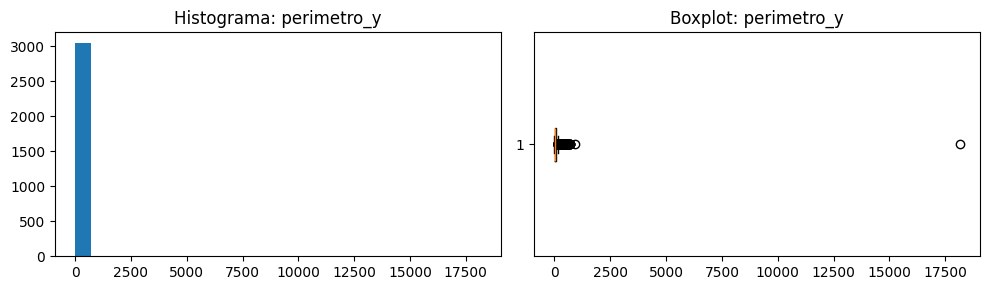


=== soma_da_luminosidade ===
min     2.550000e+02
25%     9.512000e+03
50%     1.783600e+04
75%     6.797800e+04
max     1.159141e+07
mean    1.930019e+05
std     4.550251e+05
Name: soma_da_luminosidade, dtype: float64
Outliers (IQR): 673 | Limites: [-78187.00, 155677.00]


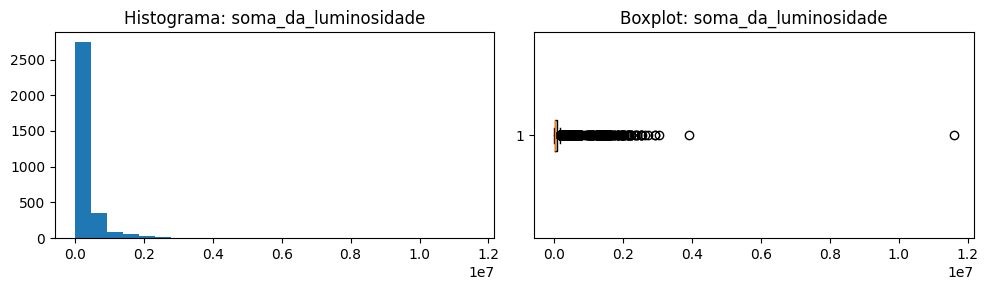


=== maximo_da_luminosidade ===
min      37.000000
25%     124.000000
50%     127.000000
75%     135.000000
max     253.000000
mean    129.189000
std      16.112715
Name: maximo_da_luminosidade, dtype: float64
Outliers (IQR): 288 | Limites: [107.50, 151.50]


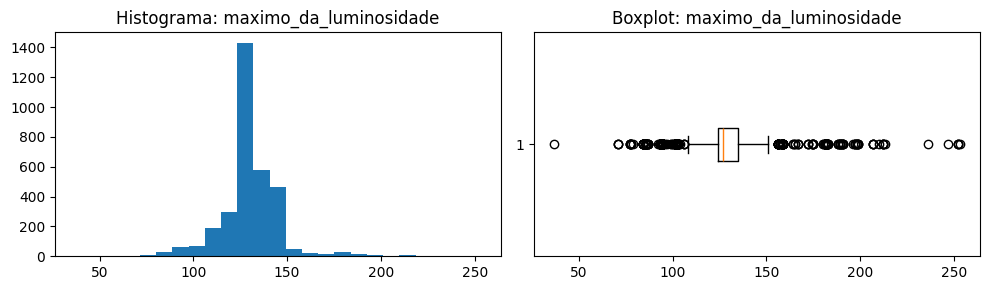


=== comprimento_do_transportador ===
min     1227.000000
25%     1358.000000
50%     1364.000000
75%     1652.000000
max     1794.000000
mean    1460.669508
std      145.631263
Name: comprimento_do_transportador, dtype: float64
Outliers (IQR): 0 | Limites: [917.00, 2093.00]


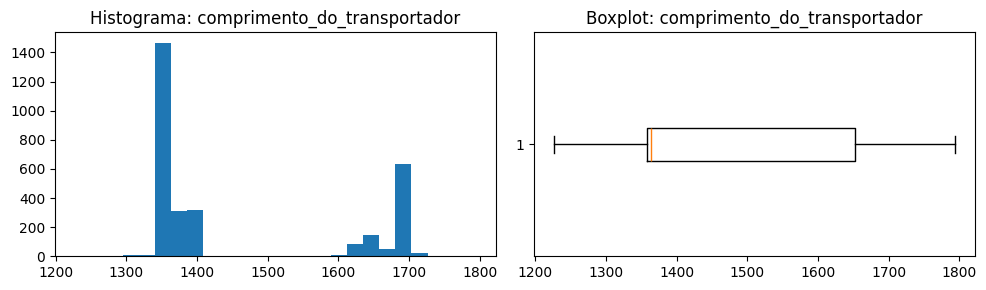


=== espessura_da_chapa_de_aço ===
min      40.000000
25%      40.000000
50%      70.000000
75%      80.000000
max     300.000000
mean     76.394020
std      52.290579
Name: espessura_da_chapa_de_aço, dtype: float64
Outliers (IQR): 336 | Limites: [-20.00, 140.00]


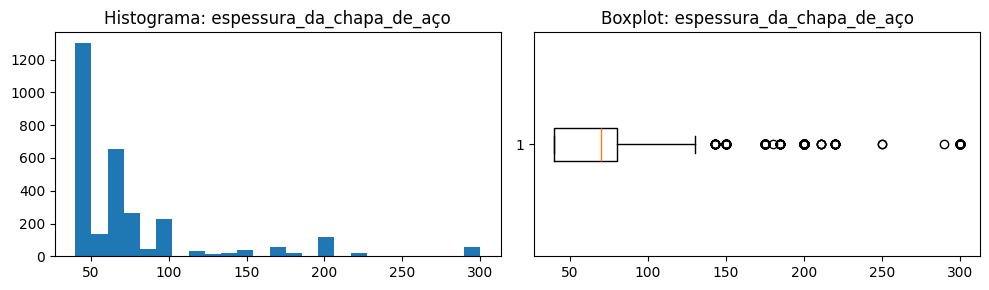


=== temperatura ===
min      45.801848
25%      73.138794
50%      79.786282
75%      86.595048
max     121.478951
mean     79.927988
std      10.000052
Name: temperatura, dtype: float64
Outliers (IQR): 19 | Limites: [52.95, 106.78]


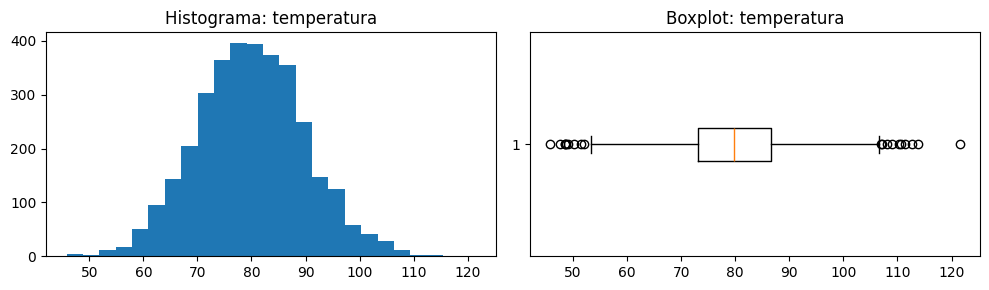


=== index_de_bordas ===
min     0.000000
25%     0.060400
50%     0.232400
75%     0.621700
max     0.995200
mean    0.340795
std     0.307044
Name: index_de_bordas, dtype: float64
Outliers (IQR): 0 | Limites: [-0.78, 1.46]


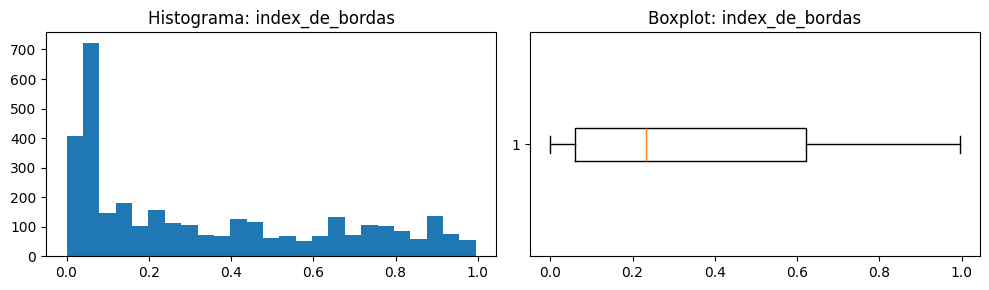


=== index_vazio ===
min     0.00000
25%     0.31310
50%     0.40950
75%     0.49600
max     0.94390
mean    0.40994
std     0.13338
Name: index_vazio, dtype: float64
Outliers (IQR): 29 | Limites: [0.04, 0.77]


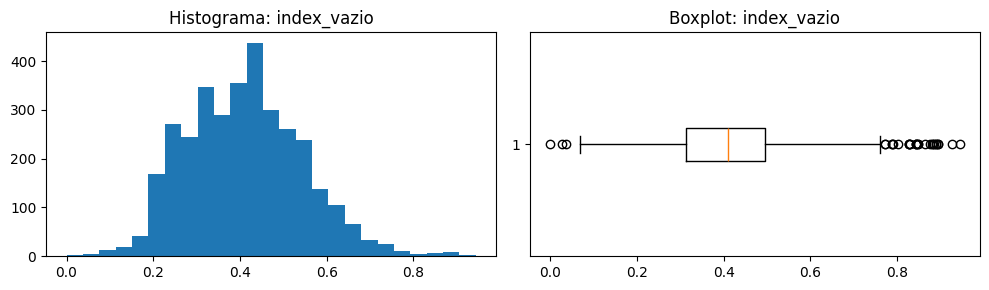


=== index_quadrado ===
min     0.008300
25%     0.366900
50%     0.545400
75%     0.818200
max     1.000000
mean    0.572080
std     0.263811
Name: index_quadrado, dtype: float64
Outliers (IQR): 0 | Limites: [-0.31, 1.50]


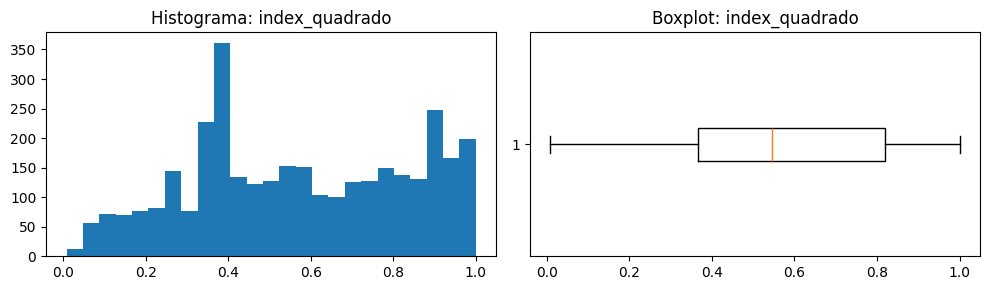


=== index_externo_x ===
min     0.001500
25%     0.006600
50%     0.009500
75%     0.021200
max     0.875900
mean    0.031977
std     0.053962
Name: index_externo_x, dtype: float64
Outliers (IQR): 650 | Limites: [-0.02, 0.04]


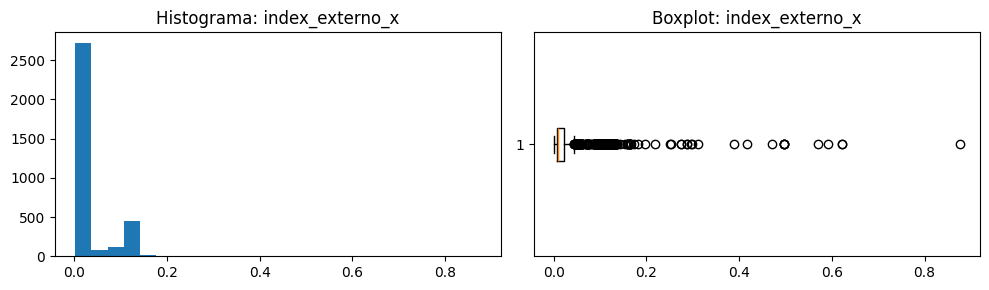


=== indice_de_bordas_x ===
min     0.014400
25%     0.434800
50%     0.636400
75%     0.789500
max     1.000000
mean    0.610739
std     0.230963
Name: indice_de_bordas_x, dtype: float64
Outliers (IQR): 0 | Limites: [-0.10, 1.32]


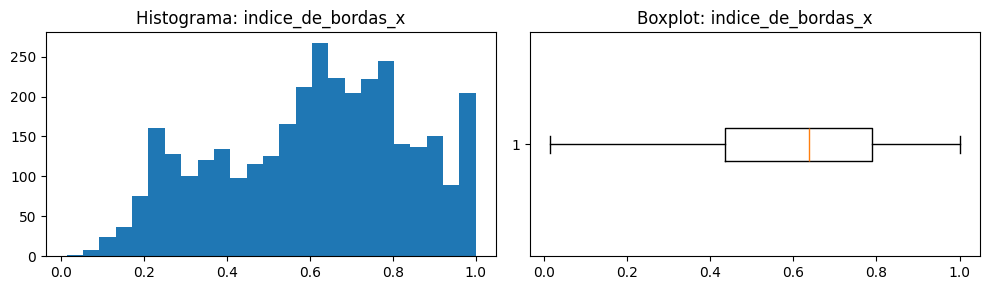


=== indice_de_bordas_y ===
min     0.048400
25%     0.642900
50%     0.964300
75%     1.000000
max     1.000000
mean    0.828377
std     0.225662
Name: indice_de_bordas_y, dtype: float64
Outliers (IQR): 2 | Limites: [0.11, 1.54]


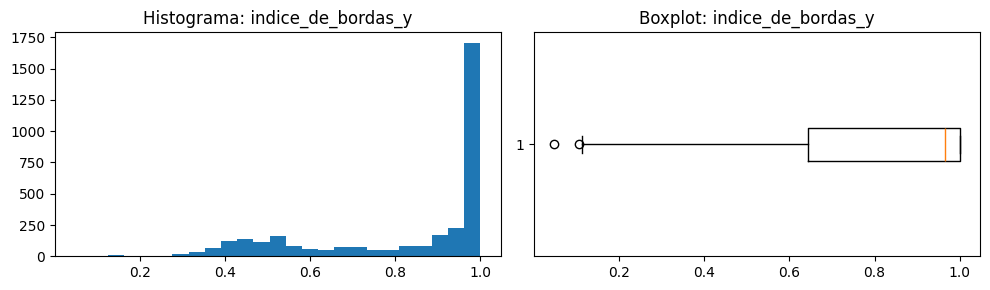


=== indice_de_variacao_x ===
min    -0.905854
25%    -0.165667
50%     0.047416
75%     0.263209
max     2.155819
mean    0.083135
std     0.381359
Name: indice_de_variacao_x, dtype: float64
Outliers (IQR): 150 | Limites: [-0.81, 0.91]


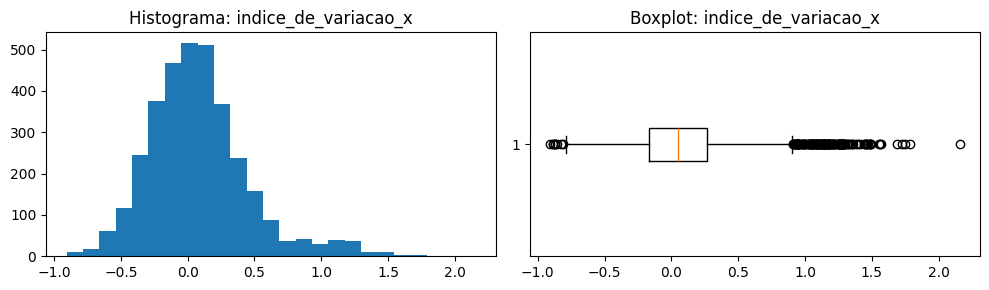


=== indice_de_variacao_y ===
min    -1.218085
25%    -0.136836
50%     0.115595
75%     0.445235
max     1.941325
mean    0.192295
std     0.473602
Name: indice_de_variacao_y, dtype: float64
Outliers (IQR): 75 | Limites: [-1.01, 1.32]


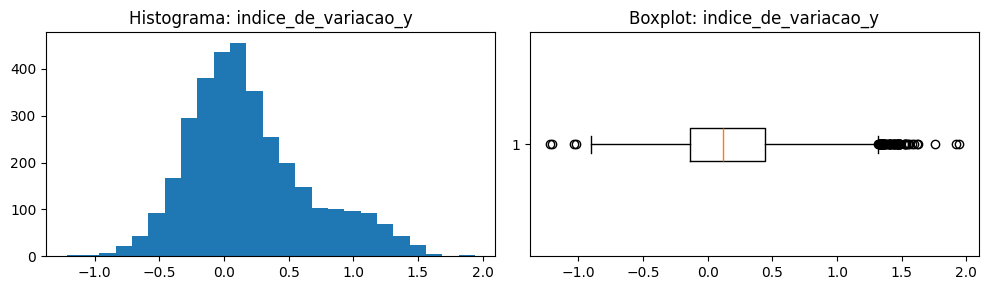


=== indice_global_externo ===
min     0.000000
25%     0.000000
50%     1.000000
75%     1.000000
max     1.000000
mean    0.589189
std     0.480628
Name: indice_global_externo, dtype: float64
Outliers (IQR): 0 | Limites: [-1.50, 2.50]


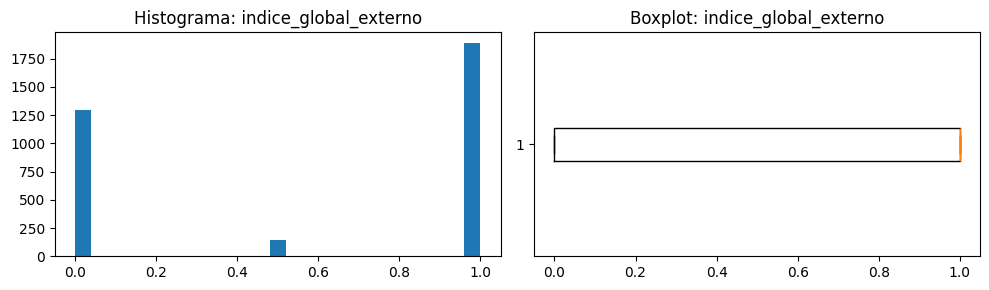


=== log_das_areas ===
min     0.301000
25%     1.929400
50%     2.225300
75%     2.826700
max     5.183700
mean    2.475957
std     0.772298
Name: log_das_areas, dtype: float64
Outliers (IQR): 60 | Limites: [0.58, 4.17]


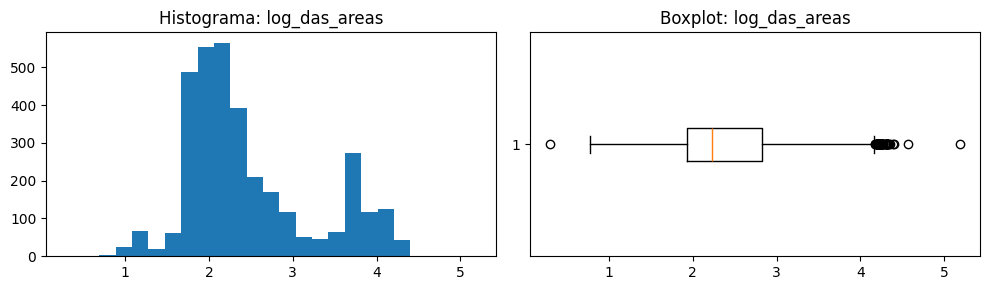


=== log_indice_x ===
min     0.301000
25%     1.000000
50%     1.146100
75%     1.477100
max     3.074100
mean    1.317482
std     0.479028
Name: log_indice_x, dtype: float64
Outliers (IQR): 396 | Limites: [0.28, 2.19]


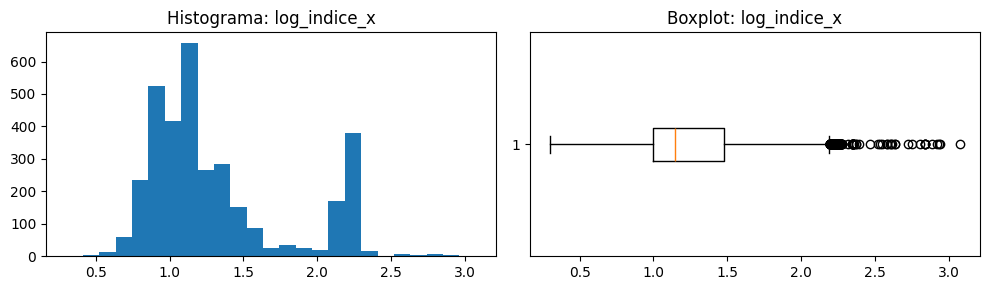


=== log_indice_y ===
min     0.000000
25%     1.079200
50%     1.322200
75%     1.724300
max     4.258700
mean    1.395204
std     0.429170
Name: log_indice_y, dtype: float64
Outliers (IQR): 4 | Limites: [0.11, 2.69]


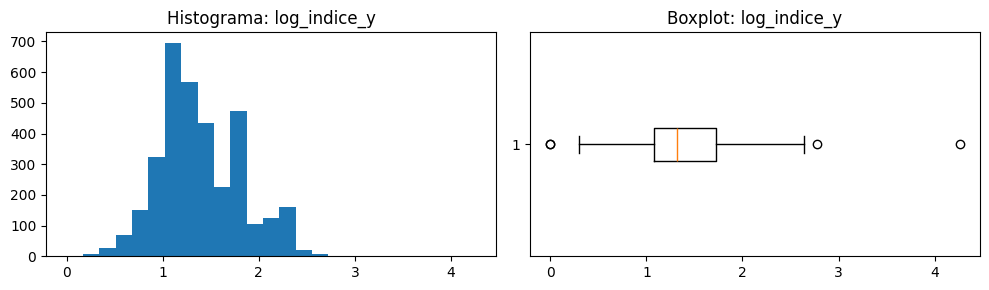


=== indice_de_orientaçao ===
min    -0.991000
25%    -0.285700
50%     0.111100
75%     0.526300
max     0.991700
mean    0.099320
std     0.492289
Name: indice_de_orientaçao, dtype: float64
Outliers (IQR): 0 | Limites: [-1.50, 1.74]


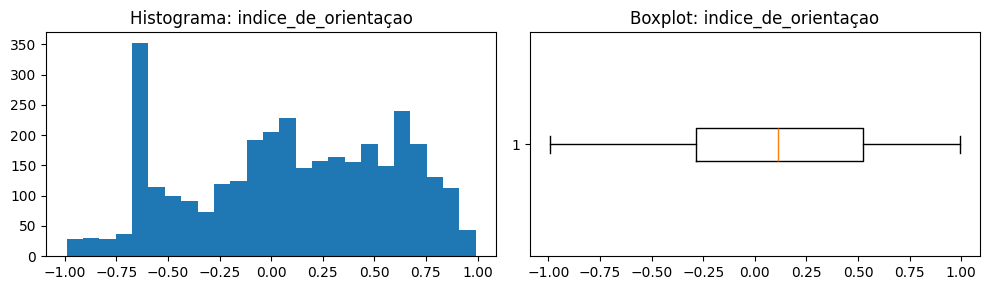


=== indice_de_luminosidade ===
min    -0.860300
25%    -0.193750
50%    -0.140800
75%    -0.079000
max     0.591700
mean   -0.134941
std     0.133192
Name: indice_de_luminosidade, dtype: float64
Outliers (IQR): 219 | Limites: [-0.37, 0.09]


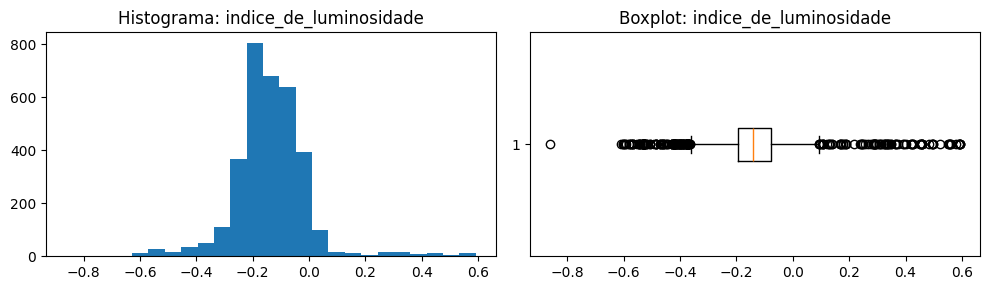


=== sigmoide_das_areas ===
min     0.119000
25%     0.248200
50%     0.471300
75%     0.999300
max     1.000000
mean    0.570236
std     0.335362
Name: sigmoide_das_areas, dtype: float64
Outliers (IQR): 0 | Limites: [-0.88, 2.13]


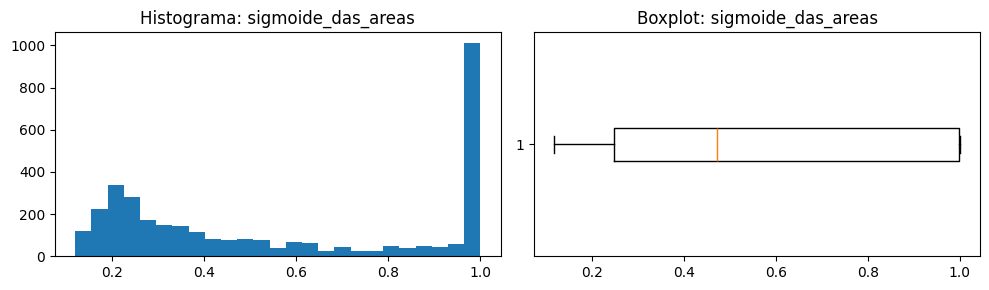


=== minimo_da_luminosidade ===
min        0.000000
25%       71.000000
50%       93.000000
75%      111.000000
max     2086.000000
mean     171.803187
std      272.982538
Name: minimo_da_luminosidade, dtype: float64
Outliers (IQR): 364 | Limites: [11.00, 171.00]


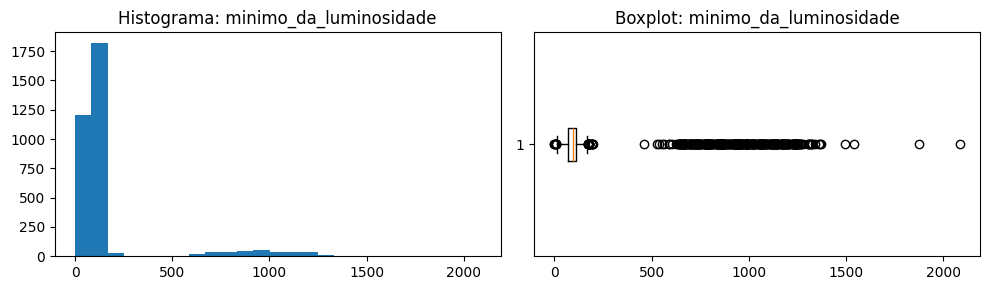

In [122]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=cols_bool, errors='ignore')

for col in num_cols:
    desc = df[col].describe()
    q1, q2, q3 = df[col].quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    n_outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)][col].shape[0]

    print(f"\n=== {col} ===")
    print(desc[['min','25%','50%','75%','max','mean','std']])
    print(f"Outliers (IQR): {n_outliers} | Limites: [{lim_inf:.2f}, {lim_sup:.2f}]")

    fig, axes = plt.subplots(1,2,figsize=(10,3))
    axes[0].hist(df[col].dropna(), bins=25)
    axes[0].set_title(f'Histograma: {col}')
    axes[1].boxplot(df[col].dropna(), vert=False)
    axes[1].set_title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

Após a análise exploratória com boxplots e histogramas, que revelou a presença de outliers em várias colunas numéricas, decidi implementar um código para quantificar e, opcionalmente, remover esses valores atípicos. A abordagem utiliza o método do intervalo interquartil (IQR) para identificar outliers, considerando valores fora dos limites `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`.

Outliers podem distorcer análises estatísticas e o desempenho de modelos de machine learning, especialmente em algoritmos sensíveis a valores extremos, como KNN e Regressão Logística. No entanto, a remoção de outliers pode eliminar informações importantes, especialmente em um contexto industrial onde valores extremos podem indicar defeitos relevantes. Por isso, introduzi uma flag `outliers_remove` (definida como `False` por padrão) para permitir flexibilidade: visualizar a quantidade de outliers sem modificar o DataFrame ou removê-los, se necessário.

**O que o código faz**:
1. Seleciona colunas numéricas, excluindo variáveis booleanas irrelevantes (como `tipo_do_aço_A300`, `falha_1`, etc.).
2. Calcula os quartis (Q1, Q3) e o IQR para cada coluna.
3. Identifica outliers e contabiliza sua ocorrência por coluna, apresentando uma tabela com a contagem, o total de linhas e o percentual.
4. Se `outliers_remove = True`, remove linhas com pelo menos um outlier em qualquer coluna numérica, criando uma cópia do DataFrame para evitar alterações acidentais.

A flag permite testar o impacto da remoção de outliers sem comprometer o conjunto de dados original.

O código foi inserido após a análise de boxplots para consolidar a detecção de outliers e garantir que decisões sobre sua remoção sejam informadas e controladas.

In [123]:
outliers_remove = False

print("Número de outliers detectados por coluna:\n")

q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)
iqr = q3 - q1

mascara_outlier = (num_cols < (q1 - 1.5 * iqr)) | (num_cols > (q3 + 1.5 * iqr))

resumo_outliers = (
    mascara_outlier.sum()
    .sort_values(ascending=False)
    .rename("Total de Outliers")
    .to_frame()
)
resumo_outliers["Total de Amostras"] = len(num_cols)
resumo_outliers["Porcentagem (%)"] = (resumo_outliers["Total de Outliers"] / len(num_cols) * 100).round(2)

print(resumo_outliers)

if outliers_remove:
    print("Removidas linhas com presença de outliers.")
    df_sem_outliers = df[~mascara_outlier.any(axis=1)].copy().reset_index(drop=True)
    print(f"Dados após remoção: {df_sem_outliers.shape[0]} registros restantes.")

    df = df_sem_outliers
else:
    print("Mantidas linhas com presença de outliers.")


Número de outliers detectados por coluna:

                              Total de Outliers  Total de Amostras  \
soma_da_luminosidade                        673               3389   
index_externo_x                             650               3389   
area_pixels                                 615               3389   
perimetro_x                                 608               3389   
log_indice_x                                396               3389   
minimo_da_luminosidade                      364               3389   
espessura_da_chapa_de_aço                   336               3389   
perimetro_y                                 323               3389   
y_minimo                                    320               3389   
maximo_da_luminosidade                      288               3389   
indice_de_luminosidade                      219               3389   
x_minimo                                    184               3389   
y_maximo                                    150

### Imputação de Valores Ausentes com Mediana

A decisão de imputar valores ausentes nas colunas `x_minimo`, `x_maximo`, `y_minimo`, `y_maximo`, `area_pixels`, `perimetro_x`, `perimetro_y`, `soma_da_luminosidade`, `maximo_da_luminosidade`, `comprimento_do_transportador`, `espessura_da_chapa_de_aço`, `index_quadrado`, `indice_global_externo` e `indice_de_luminosidade` utilizando a mediana foi baseada em dois fatores principais. Primeiro, essas colunas representam medidas numéricas contínuas, e a mediana é uma estatística robusta que não é influenciada por valores extremos, ao contrário da média, garantindo uma imputação mais representativa. Segundo, a presença de valores ausentes (possivelmente devido a falhas de sensores, erros de software ou imputação humana) poderia comprometer análises posteriores. Assim, o código calcula a mediana de cada coluna e preenche os valores ausentes com sua respectiva mediana.

In [167]:
cols_to_impute = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade', 'maximo_da_luminosidade', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço', 'index_quadrado', 'indice_global_externo', 'indice_de_luminosidade']
medians = df[cols_to_impute].median()
df[cols_to_impute] = df[cols_to_impute].fillna(medians)


🔍 Verificando novamente valores ausente, após inserção da mediana em certas colunas


In [168]:
df.isnull().sum()

,0
id,0
x_minimo,0
x_maximo,0
y_minimo,0
y_maximo,0
peso_da_placa,0
area_pixels,0
perimetro_x,0
perimetro_y,0
soma_da_luminosidade,0


## 🗑️ Decisão de Remoção das Colunas `id` e `peso_da_placa`

As colunas `id` e `peso_da_placa` foram removidas antes da modelagem. O `id`, por ser um identificador único, não tem relevância preditiva. O `peso_da_placa` possui valor fixo (100) para todas as amostras, o que é inconsistente, dado que chapas com diferentes espessuras e áreas deveriam ter pesos variados. A remoção reduz ruído e mantém apenas features relevantes para o modelo.

In [169]:
cols_to_drop = [
    'id',
    'peso_da_placa'
]

df_model = df.drop(columns=cols_to_drop)

print(df_model.columns.tolist())

['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade', 'maximo_da_luminosidade', 'comprimento_do_transportador', 'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço', 'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado', 'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y', 'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo', 'log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao', 'indice_de_luminosidade', 'sigmoide_das_areas', 'minimo_da_luminosidade', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']


## 📊 Visualização da Distribuição das Classes de Defeitos

Para analisar a distribuição dos defeitos, utilizei um gráfico de contagem com Seaborn, que exibe a frequência de cada tipo de defeito. Essa visualização revela desbalanceamentos entre classes, orientando decisões de pré-processamento, como possível uso de SMOTE para classes minoritárias, e a escolha de métricas adequadas para a modelagem.

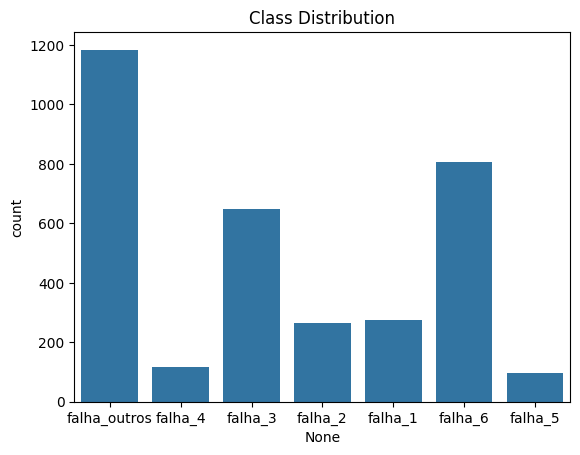

In [170]:
sns.countplot(x=df[["falha_1", "falha_2", "falha_3", "falha_4", "falha_5", "falha_6", "falha_outros"]].idxmax(axis=1))
plt.title("Class Distribution")
plt.show()

## 📊 Análise de Correlação entre Features

Para identificar possíveis multicolinearidades que possam impactar o modelo, calculei a matriz de correlação das features numéricas usando o método de Pearson. Um heatmap foi gerado para visualização, destacando correlações absolutas, que podem indicar redundância entre variáveis. Essa análise ajuda a decidir quais features podem ser removidas para reduzir dimensionalidade e evitar overfitting, mantendo apenas as mais informativas para a previsão de defeitos.

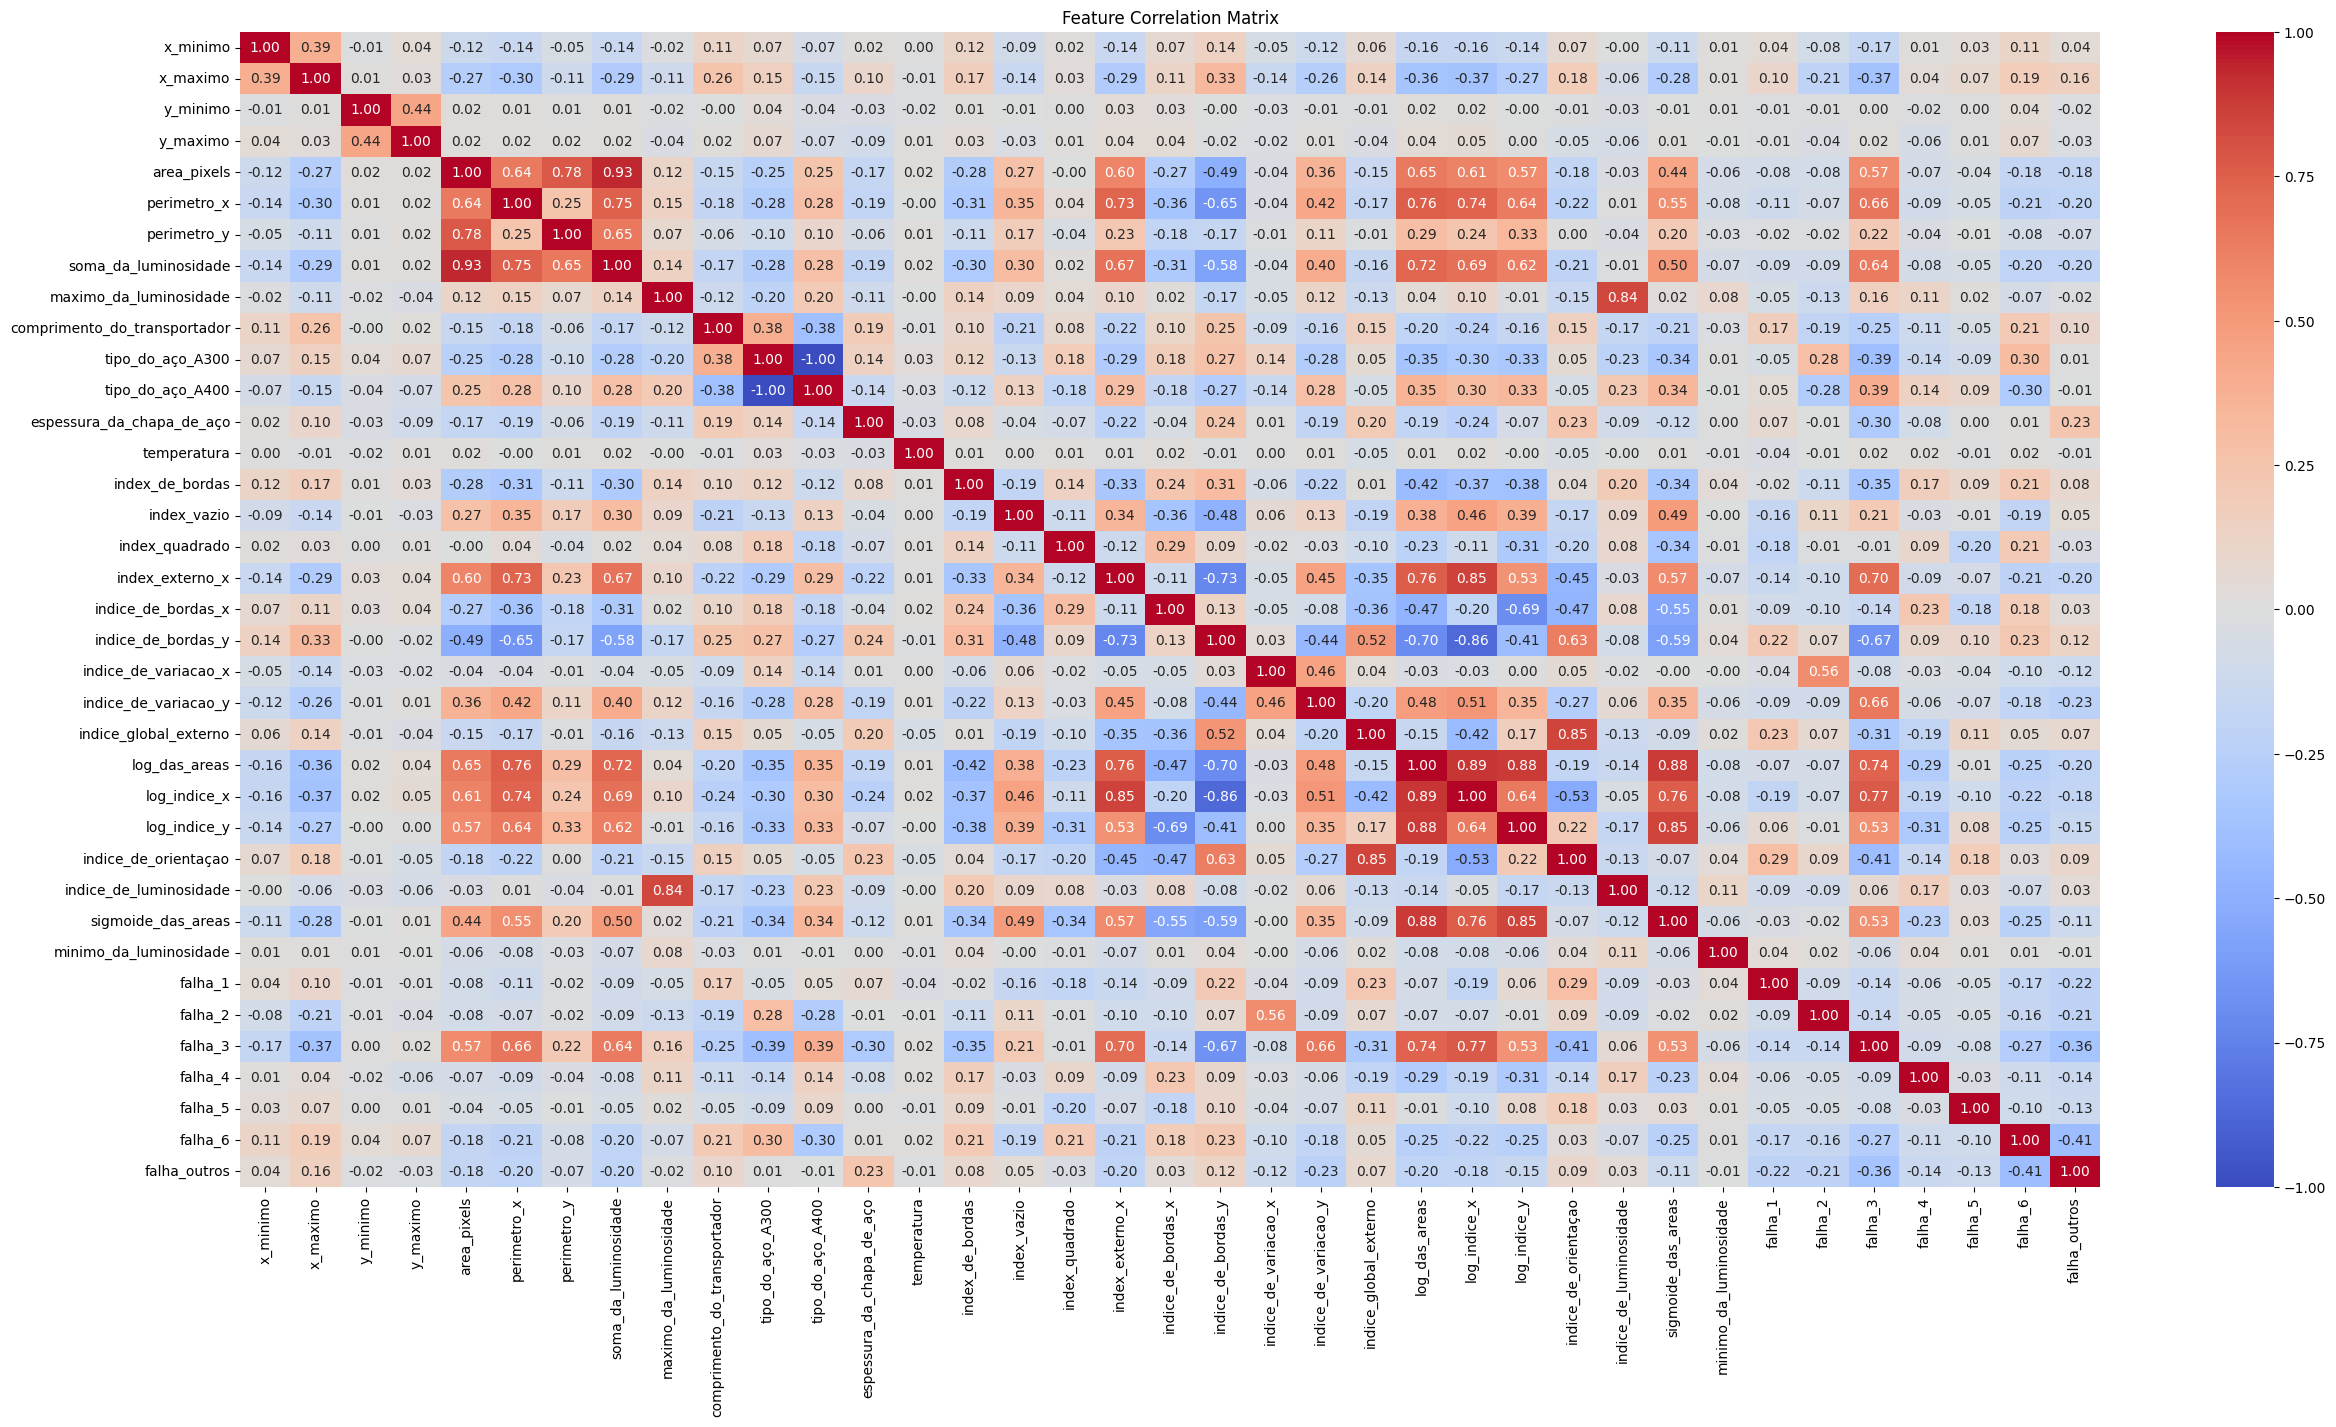

In [128]:
corr_matrix = df_model.corr(method='pearson')
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

## 🧠 Transformação da Variável Alvo para Classificação Multiclasse

Nesta etapa, consolidei as colunas de rótulos (`falha_1` a `falha_6` e `falha_outros`) em uma única variável alvo chamada `target`, adequada para o problema de **classificação multiclasse**. Como cada amostra possui apenas uma classe de defeito associada (indicada por um valor 1 nas colunas one-hot encoded), utilizei a função `idxmax(axis=1)` para identificar a coluna com valor 1, determinando a classe correspondente. Em seguida, mapeei os nomes das colunas para inteiros (1 a 7) usando um dicionário, facilitando o uso em algoritmos de machine learning. Por fim, removi as colunas originais de rótulos, criando o conjunto de features (`X`) e a variável alvo (`y`) para o modelo. Essa abordagem reflete a natureza multiclasse do problema, onde o objetivo é prever uma das sete categorias de defeitos.

In [171]:
target_columns = ["falha_1", "falha_2", "falha_3", "falha_4", "falha_5", "falha_6", "falha_outros"]

df_model["target"] = df_model[target_columns].idxmax(axis=1)

defect_mapping = {
    "falha_1": 1,
    "falha_2": 2,
    "falha_3": 3,
    "falha_4": 4,
    "falha_5": 5,
    "falha_6": 6,
    "falha_outros": 7
}

df_model["target"] = df_model["target"].map(defect_mapping)

df_model = df_model.drop(columns=target_columns)

X = df_model.drop(columns=["target"])
y = df_model["target"]

## ⚙️ Preparação dos Dados e Avaliação de Modelos de Classificação
Com a variável alvo target devidamente estruturada para representar um problema de classificação multiclasse, dei continuidade ao processo de modelagem iniciando pela padronização das variáveis preditoras. Para isso, utilizei o StandardScaler, que transforma os dados para que tenham média zero e desvio padrão um.

Após a normalização, os dados foram divididos em conjuntos de treino e teste na proporção de 80/20, com estratificação da variável alvo para manter a distribuição das classes em ambos os conjuntos.

Com os dados preparados, implementei uma comparação entre diferentes algoritmos de classificação supervisionada, incluindo:

- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Árvore de Decisão
- Floresta Aleatória
- Regressão Logística

Cada modelo foi treinado e avaliado com base nas métricas de acurácia, precisão, recall e F1-score, utilizando média ponderada (weighted) para lidar com eventuais desequilíbrios nas classes.

In [172]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=2000)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

results_df = pd.DataFrame(results).T
print(results_df)

                     accuracy  precision    recall        f1
KNN                  0.643068   0.645363  0.643068  0.642293
SVM                  0.675516   0.699733  0.675516  0.654908
Decision Tree        0.575221   0.578854  0.575221  0.576454
Random Forest        0.684366   0.684164  0.684366  0.674553
Logistic Regression  0.659292   0.653083  0.659292  0.650782


## 📊 Avaliação do Modelo com Random Forest
Após comparar o desempenho de diferentes algoritmos, selecionei o Random Forest como modelo final devido à sua robustez e desempenho consistente nas métricas avaliadas. Com o modelo ajustado sobre os dados de treino, utilizei o conjunto de teste para realizar a predição e avaliar a performance de forma mais aprofundada.

A primeira análise foi feita por meio da matriz de confusão, que permite visualizar o número de acertos e erros por classe.

Em seguida, para uma análise mais refinada, utilizei a técnica One-vs-Rest para gerar as curvas ROC (Receiver Operating Characteristic) para cada uma das sete classes de falhas. Essa abordagem permite avaliar a capacidade discriminativa do modelo em separar cada classe individualmente das demais. Também foi calculada a AUC (Área sob a Curva) para cada classe, o que quantifica a performance do modelo em termos de sensibilidade e especificidade.

As curvas ROC evidenciam a qualidade das probabilidades preditas pelo modelo, e os valores de AUC acima de 0.80 para a maioria das classes indicam um bom desempenho geral, mesmo em um cenário de múltiplas categorias.

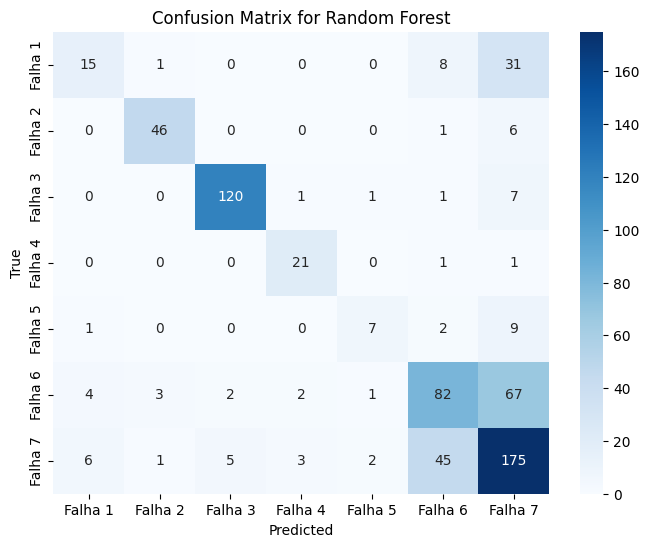

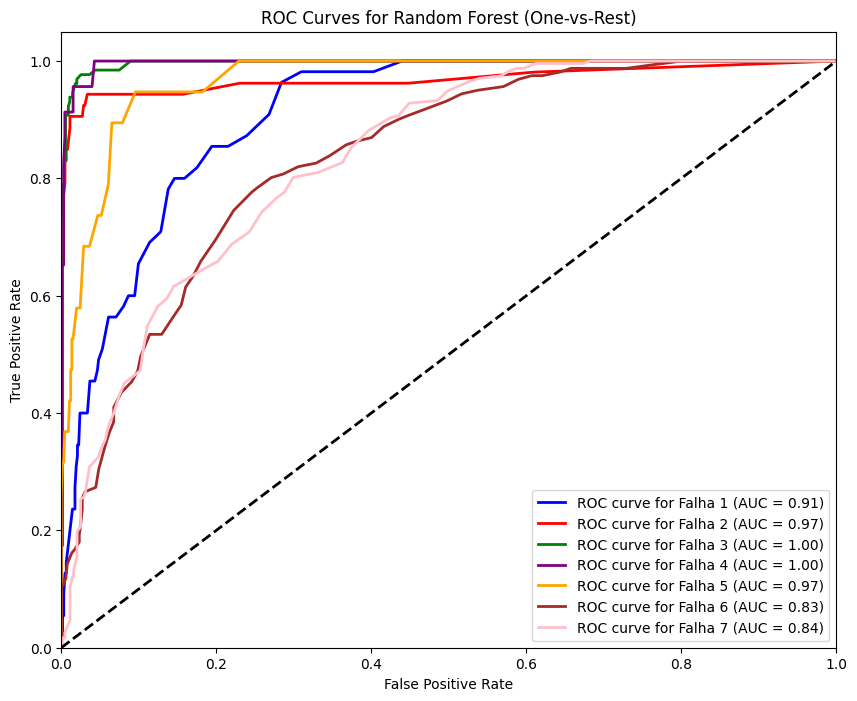

ROC-AUC for Falha 1: 0.9099
ROC-AUC for Falha 2: 0.9691
ROC-AUC for Falha 3: 0.9968
ROC-AUC for Falha 4: 0.9959
ROC-AUC for Falha 5: 0.9670
ROC-AUC for Falha 6: 0.8350
ROC-AUC for Falha 7: 0.8355


In [174]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Falha {i}' for i in range(1, 8)],
            yticklabels=[f'Falha {i}' for i in range(1, 8)])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7])
y_score = best_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for Falha {i+1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

for i in range(7):
    print(f'ROC-AUC for Falha {i+1}: {roc_auc[i]:.4f}')

## 🚀 Preparação e Geração do Arquivo de Submissão

Nesta etapa final, processei o conjunto de dados de teste (`bootcamp_test.csv`) e gerei o arquivo de submissão para avaliação. Carreguei o arquivo e apliquei as mesmas transformações realizadas no conjunto de treino, como a conversão das colunas booleanas `tipo_do_aço_A300` e `tipo_do_aço_A400` para 0/1, preenchendo valores ausentes com base na relação complementar e removendo inconsistências (linhas onde a soma dos tipos de aço é 0). Substituí valores negativos por `pd.NA` em colunas de medidas físicas e imputei valores ausentes com as medianas calculadas no conjunto de treino. Após remover as colunas irrelevantes `id` e `peso_da_placa`, transformei os dados usando o mesmo escalador (`scaler`) ajustado no treino. Utilizei o modelo otimizado random_forest(`best_model`) para prever as probabilidades de cada classe de defeito, gerando um DataFrame de submissão com as colunas `id` e as probabilidades para `falha_1` a `falha_outros`. Por fim, salvei o resultado em `bootcamp_submission.csv`, pronto para envio.

In [175]:
df_test = pd.read_csv('/content/drive/MyDrive/bootcamp/bootcamp_test.csv')

id_column = df_test['id'].copy()

cols_bool_test = ['tipo_do_aço_A300', 'tipo_do_aço_A400']
df_test = convert_bool_columns(df_test, cols_bool_test, bool_map)

df_test['tipo_do_aço_A300'] = df_test['tipo_do_aço_A300'].fillna(1 - df_test['tipo_do_aço_A400'])
df_test['tipo_do_aço_A400'] = df_test['tipo_do_aço_A400'].fillna(1 - df_test['tipo_do_aço_A300'])

df_test = df_test[(df_test['tipo_do_aço_A300'] + df_test['tipo_do_aço_A400']) != 0].reset_index(drop=True)
id_column = id_column[df_test.index]

for col in ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço']:
    df_test[col] = df_test[col].mask(df_test[col] < 0, pd.NA)

cols_to_impute_test = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade', 'maximo_da_luminosidade', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço', 'index_quadrado', 'indice_global_externo', 'indice_de_luminosidade']
df_test[cols_to_impute_test] = df_test[cols_to_impute_test].fillna(medians)

df_test = df_test.drop(columns=['id', 'peso_da_placa'])

X_test_final = scaler.transform(df_test)

y_prob_test = best_model.predict_proba(X_test_final)

submission_df = pd.DataFrame({
    'id': id_column,
    'falha_1': y_prob_test[:, 0],
    'falha_2': y_prob_test[:, 1],
    'falha_3': y_prob_test[:, 2],
    'falha_4': y_prob_test[:, 3],
    'falha_5': y_prob_test[:, 4],
    'falha_6': y_prob_test[:, 5],
    'falha_outros': y_prob_test[:, 6]
})

submission_df.to_csv('/content/drive/MyDrive/bootcamp/bootcamp_submission.csv', index=False)
print("\nArquivo de submissão salvo em: /content/drive/MyDrive/bootcamp/bootcamp_submission.csv")


Primeiras linhas das previsões e probabilidades:
     id  falha_1  falha_2  falha_3  falha_4  falha_5  falha_6  falha_outros
0  3390     0.01     0.04     0.02      0.0     0.01     0.39          0.53
1  3391     0.12     0.01     0.08      0.0     0.03     0.20          0.56
2  3392     0.11     0.02     0.02      0.0     0.00     0.34          0.51
3  3393     0.11     0.02     0.05      0.0     0.12     0.35          0.35
4  3394     0.04     0.02     0.00      0.0     0.00     0.60          0.34

Arquivo de submissão salvo em: /content/drive/MyDrive/bootcamp/bootcamp_submission_example.csv
